# Machine Learning Algorithms for Classification

A comparison of different classification algorithms in scikit-learn using the Wheat Seeds data set from UCI found here:
http://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt

Code is based on the examples provided by the book:
Python Machine Learning 2nd Edition by Sebastian Raschka, Packt Publishing Ltd. 2017

## Import packages and data

Import initial packages and data into a pandas dataframe

In [4]:
import numpy as np
import pandas as pd
import timeit
from sklearn.metrics import accuracy_score


""" Import data """
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt', sep = "\s+", header = None )
df.columns = ["Area", "Perimeter", "Compactness", "Length of Kernel", "Width of Kernel", 
                             "Asymmetry coefficient", "Length of kernel groove", "Class"]


In [110]:
df.head()


,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry coefficient,Length of kernel groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


## Split data into training and test sets

The data will be split into 70% for the training set and 30% for the test set. Two of the features (Asymmetry coefficient and length of kernel groove) have been selected for classifying the target (class of seed).

The features are then standardized for the the fitting models.

In [5]:
features = ["Asymmetry coefficient", "Length of kernel groove"]
target = ["Class"]

X = df[features]
y = df[target]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

""" Standardize data """
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.vstack((y_train, y_test))



## Define plotting function

Function is defined for plotting the features of the data set for a visual representation of the classification quality for training and test sets.

In [6]:
from IPython.display import Image
%matplotlib inline

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

## Kernel SVM

Classify dataset using kernel SVM

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


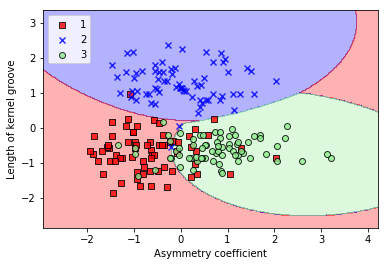

In [7]:
""" Solve using a kernel SVM """

from sklearn.svm import SVC

start_time = timeit.default_timer()
svm = SVC(kernel='rbf', random_state = 0, gamma=0.10, C=10.0)
svm.fit(X_train_std, y_train)
svm_time = timeit.default_timer() - start_time


""" Show plot of Training Data """

plot_decision_regions(X=X_combined_std, y=y_combined.ravel(), classifier=svm)

plt.xlabel('Asymmetry coefficient')
plt.ylabel('Length of kernel groove')
plt.legend(loc='upper left')
plt.show()



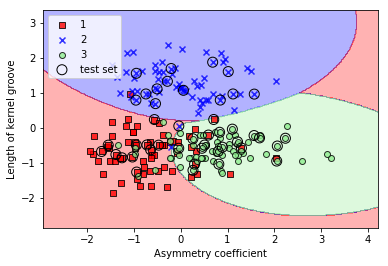

The accuracy of the svm classifier on training data is 0.86 out of 1
The accuracy of the svm classifier on test data is 0.87 out of 1


In [8]:
""" Predict Test Data """
predictions = svm.predict(X_test)

plot_decision_regions(X=X_combined_std, y=y_combined.ravel(), classifier=svm, test_idx=range(105,150))

plt.xlabel('Asymmetry coefficient')
plt.ylabel('Length of kernel groove')
plt.legend(loc='upper left')
plt.show()

#accuracy_score(y_true = y_test, y_pred = predictions)
print('The accuracy of the svm classifier on training data is {:.2f} out of 1'.format(svm.score(X_train_std, y_train)))

print('The accuracy of the svm classifier on test data is {:.2f} out of 1'.format(svm.score(X_test_std, y_test)))


## Decision Tree Learning

Classify dataset using a decision tree.

The accuracy of the decision tree classifier on training data is 0.33 out of 1
The accuracy of the decision tree classifier on test data is 0.33 out of 1


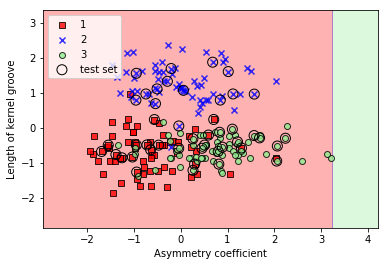

In [10]:
from sklearn.tree import DecisionTreeClassifier

start_time = timeit.default_timer()
tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
tree.fit(X_train,y_train)
tree_time = timeit.default_timer() - start_time


plot_decision_regions(X_combined_std, y_combined.ravel(), classifier = tree, test_idx=range(105,150))

plt.xlabel('Asymmetry coefficient')
plt.ylabel('Length of kernel groove')
plt.legend(loc='upper left')
plt.show


print('The accuracy of the decision tree classifier on training data is {:.2f} out of 1'.format(tree.score(X_train_std, y_train)))
print('The accuracy of the decision tree classifier on test data is {:.2f} out of 1'.format(tree.score(X_test_std, y_test)))


## K-nearest neighbors

Classify dataset using K-nearest Neighbors

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


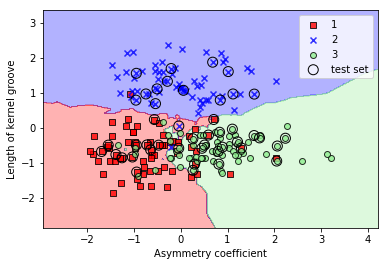

The accuracy of the KNN classifier on training data is 0.86 out of 1
The accuracy of the KNN classifier on test data is 0.90 out of 1


In [11]:
from sklearn.neighbors import KNeighborsClassifier

start_time = timeit.default_timer()
knn = KNeighborsClassifier (n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)
KNN_time = timeit.default_timer() - start_time

plot_decision_regions(X_combined_std, y_combined.ravel(), classifier=knn, test_idx=range(105,150))

plt.xlabel('Asymmetry coefficient')
plt.ylabel('Length of kernel groove')
plt.legend(loc='upper right')
plt.show()

print('The accuracy of the KNN classifier on training data is {:.2f} out of 1'.format(knn.score(X_train_std, y_train)))
print('The accuracy of the KNN classifier on test data is {:.2f} out of 1'.format(knn.score(X_test_std, y_test)))


## Summary of performance metrics of algorithms

The time for training each model is listed in seconds, along with the classification accuracy for the training and test sets for each model.

In [15]:
print('The training time for SVM is ', str(round(svm_time, 3)), 'seconds.')
print('The training time for the decision tree is ', str(round(tree_time, 3)), 'seconds.')
print('The training time for KNN is ', str(round(KNN_time, 3)), 'seconds.')
print(' ')
print('The training accuracy for SVM is ', str(round(svm.score(X_train_std, y_train), 2)), 'out of 1.')
print('The training accuracy for decision tree is ', str(round(tree.score(X_train_std, y_train), 2)), 'out of 1.')
print('The training accuracy for KNN is ', str(round(knn.score(X_train_std, y_train), 2)), 'out of 1.')
print(' ')
print('The test accuracy for SVM is ', str(round(svm.score(X_test_std, y_test), 2)), 'out of 1.')
print('The test accuracy for decision tree is ', str(round(tree.score(X_test_std, y_test), 2)), 'out of 1.')
print('The test accuracy for KNN is ', str(round(knn.score(X_test_std, y_test), 2)), 'out of 1.')

The training time for SVM is  0.009 seconds.
The training time for the decision tree is  0.002 seconds.
The training time for KNN is  0.005 seconds.
 
The training accuracy for SVM is  0.86 out of 1.
The training accuracy for decision tree is  0.33 out of 1.
The training accuracy for KNN is  0.86 out of 1.
 
The test accuracy for SVM is  0.87 out of 1.
The test accuracy for decision tree is  0.33 out of 1.
The test accuracy for KNN is  0.9 out of 1.
